In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.audio import *

In [6]:
sg_cfg= SpectrogramConfig(hop=480, n_mels=128, n_fft=960, top_db=80, f_min=20, f_max=22050)
config_split= AudioConfig(remove_silence = "all", silence_padding=200, silence_threshold=20, sg_cfg=sg_cfg)

In [7]:
rs = RemoveSilenceProcessor(config=config_split)

NameError: name 'RemoveSilenceProcessor' is not defined

In [8]:
train_df = pd.read_csv(Path("./data/train.tsv"),sep="\t")

In [9]:
data = (AudioList.from_folder("data/clips", config=config_split)#, processor=[rs])
        .use_partial_data(0.01, seed=42)
        .filter_by_func(lambda x: x.name in list(train_df.path))
        .split_by_rand_pct(0.2, seed=42)
        .label_from_func(lambda x: train_df[train_df.path==str(x).split("/")[-1]]["sentence"].iloc[0], label_cls=ItemList)
        .databunch()
       )

Preprocessing: Removing Silence


Preprocessing: Removing Silence


You can deactivate this warning by passing `no_check=True`.


/home/kbird/fastai/fastai/basic_data.py:269: UserWarning: It's not possible to collate samples of your dataset together in a batch.
  warn(message)


File: data/clips/.cache/sh-a_20-200/common_voice_en_18752090.mp3-7650a11c561d129f5a343da8dc89affb/0.wav
Total Length: 2.6 seconds


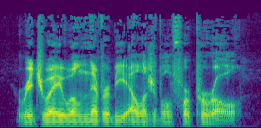

Shape: 128x261


In [10]:
data.train_ds[0][0].show()

In [15]:
tst = data.train_ds[0][0]

In [27]:
??tst.get_spec_images

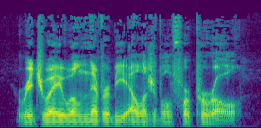

In [31]:
tst.get_spec_images()[0]

In [232]:
tst = nn.Sequential(*[nn.Linear(in_features=315536, out_features=2048, bias=True),
                     nn.ReLU(),
                     nn.Linear(in_features=2048, out_features=2048, bias=True),
                     nn.ReLU(),
                     nn.Linear(in_features=2048, out_features=2048, bias=True),
                     nn.ReLU(),
                     nn.RNN(input_size=2048, hidden_size=2048, bidirectional=True)
                      nn.
                     ]
)